In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree
import pydot_ng as pdot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
import itertools
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy import stats
from sklearn.feature_selection import VarianceThreshold 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import Imputer

In [2]:
data = pd.read_csv('/home/data/MSA8010/msa8010f16t10/Undersampledata.csv')

#data = data.fillna(0)
#Imputer(missing_values='NaN',strategy='mean',)

#data.isnull().sum()

datanew = data.dropna()

#datanew.isnull().sum()

In [3]:
all_features = set(data.columns)-set(['loan_status'])

num_features = set(data.describe().columns)
cat_features = all_features-num_features

In [4]:
allnumeric = {}

def cat_numeric(column):
    dct = {}
    for i in range(len(column)):
        dct[column[i]] = i
    return dct 

data_num = datanew.copy()

for j in cat_features:
    allnumeric[j] = cat_numeric(datanew[j].unique())
    data_num[j].replace(allnumeric[j],inplace=True)

    
data_num.head(5)

#0:Fully Paid, 1: Charged off or Default

,loan_status,loan_amnt (optional),installment (optional),annual_inc (optional),term,int_rate,grade,emp_length,home_ownership,verification_status,...,dti2 (optional),total_dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,Credit History (year)
0,0,9500,329.79,53000.0,0,15.10,1,0,1,2,...,7.467,27.117,1,1,13,0,9511,63.8,28,0.700
1,0,25000,562.18,54996.0,0,9.99,0,0,0,0,...,12.267,31.577,2,2,10,0,3788,28.8,63,23.191
2,0,1600,33.41,26400.0,1,9.25,0,4,0,2,...,1.519,24.289,0,0,7,0,1111,12.6,10,0.522
3,0,8500,269.83,43000.0,0,8.88,0,8,0,2,...,7.530,14.810,0,1,5,0,10392,38.5,7,0.186
4,0,2500,80.23,79800.0,0,9.62,0,0,0,1,...,1.206,20.696,0,0,8,0,18914,71.1,27,15.941


In [9]:
#KNN model for all of the features
model = KNeighborsClassifier(n_neighbors=5)
features = data_num.drop('loan_status',1)
#features = data_num.drop(['loan_status','annual_inc (optional)','dti (optional)','dti2 (optional)','installment (optional)','loan_amnt (optional)'],1)
X_train, X_test, y_train, y_test = train_test_split(Infofeature, data_num['loan_status'],test_size=.3, random_state=36)

model.fit(Infofeature, data_num['loan_status'])

y_pred = model.fit(X_train,y_train).predict(X_test)
expected = data_num['loan_status']
predicted = model.predict(Infofeature)

#print (metrics.confusion_matrix(expected,predicted))

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[6995 5407]
 [5522 8456]]


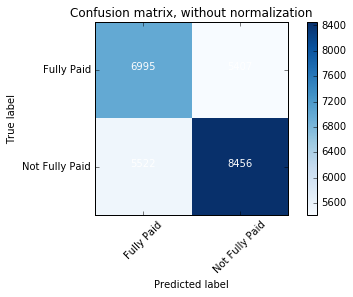

In [11]:
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

class_names = ['Fully Paid','Not Fully Paid']

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      #title='Normalized confusion matrix')

#plt.show()


In [12]:
precision_score(y_test,y_pred)

0.60996898218278872

In [13]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.56      0.56      0.56     12402
          1       0.61      0.60      0.61     13978

avg / total       0.59      0.59      0.59     26380



In [30]:
confusion_matrix(y_test,ŷ)
precision_recall_fscore_support(y_test, ŷ)
precision_score(y_test,ŷ)

NameError: name 'ŷ' is not defined

In [ ]:
#Evaluation 
for n in [3,5,7,11,13]:
    model = KNeighborsClassifier(n_neighbors=n)
    X_train, X_test, y_train, y_test = train_test_split(features, data_num['loan_status'], random_state=42)
    model.fit(X_train,y_train)
    ŷ = model.predict(X_test)
    print('n_neighbors %d' % n)
    print(classification_report(y_test, ŷ))




In [16]:
#Feature Permutation
%time
nfeature = 16
res_df = pd.DataFrame(columns = ['features','precision','recall','F-score'])
N = len(list(itertools.combinations(all_inforfeatures, nfeature)))
for i in range(N): 
    l = list(itertools.combinations(all_inforfeatures, nfeature))[i]
    col = list(l)
    X = data_num[col].as_matrix()
    y = data_num.loan_status.as_matrix()
    clf = KNeighborsClassifier(n_neighbors= 5,weights = 'distance')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=36)
    clf.fit(X_train, y_train)
    ŷ = clf.predict(X_test)
    precision = precision_score(y_test,ŷ)
    recall = recall_score(y_test,ŷ)
    f_score = f1_score(y_test,ŷ)
    #zip merges lists and matches keys with values
    row = pd.Series(dict(zip(['features','precision','recall','F-score'],['|'.join(col),precision,recall,f_score])))
    res_df = res_df.append(row,ignore_index = True)
    #AccuracyScore = accuracy_score(y_test,ŷ)
    #print(list(itertools.combinations(all_features, nfeature))[N-1:N])
    #print(classification_report(y_test,ŷ ))
    print(i)
    
    
res_df
res_df.to_csv('res_df.csv')
#.to_excel('/Users/raofu/Desktop/Data Programming Final Project/res_df.csv')  
    
    

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 12.2 µs
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
26

In [37]:
features.columns

Index(['loan_amnt (optional)', 'installment (optional)',
       'annual_inc (optional)', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'verification_status', 'purpose', 'addr_state',
       'dti (optional)', 'dti2 (optional)', 'total_dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'Credit History (year)'],
      dtype='object')

In [7]:
#Delete the optional features
Newfeature = features.drop(['loan_amnt (optional)','installment (optional)','annual_inc (optional)','dti (optional)','dti2 (optional)'],1)
#The accuracy rate decreased a bit. 


In [15]:
#Feature selected based on Information Gain 
Infofeature = features.drop(['delinq_2yrs','open_acc','pub_rec'],1)
all_inforfeatures = set(Infofeature)
#Optimal number of features is 16 based on Information Gain


In [58]:
#Feature Selection based on Variance 
sel = VarianceThreshold(threshold=(.8 * 30*(1 - .8)))
pd.DataFrame(sel.fit_transform(features))
sel.get_support()
#np.sum(sel.get_support())

array([ True,  True,  True, False,  True, False,  True, False, False,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True], dtype=bool)

In [22]:
#Features selected by VarianceThreshold
Varfeature = features.drop(['term','grade','home_ownership','verification_status','delinq_2yrs','inq_last_6mths','pub_rec'],1)
all_featuresnew = Varfeature.columns
all_featuresnew

Index(['loan_amnt (optional)', 'installment (optional)',
       'annual_inc (optional)', 'int_rate', 'emp_length', 'purpose',
       'addr_state', 'dti (optional)', 'dti2 (optional)', 'total_dti',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'Credit History (year)'],
      dtype='object')

In [36]:
#Tree-based feature selection 
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf1 = clf.fit(features,data_num['loan_status'])
model = SelectFromModel(clf1,prefit=True)
X_new = model.transform(features)
X_new.shape

model.get_support()


array([ True,  True,  True, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True], dtype=bool)

In [39]:
#Tree-based selected features
Treefeature = features.drop(['term','grade','home_ownership','verification_status','purpose','delinq_2yrs','inq_last_6mths','pub_rec'],1)
all_treefeatures = Treefeature.columns
all_treefeatures

#It doesn't really improve the accuracy

Index(['loan_amnt (optional)', 'installment (optional)',
       'annual_inc (optional)', 'int_rate', 'emp_length', 'addr_state',
       'dti (optional)', 'dti2 (optional)', 'total_dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'Credit History (year)'],
      dtype='object')

In [22]:
#PCA Feature Selection 
from sklearn.decomposition import PCA
nf=15
pca = PCA(n_components=nf)
pca.fit(features)
X_proj = pca.transform(features)
X_rec = pca.inverse_transform(X_proj)
#PCA doesn't improve much the accuracy rate. 
